In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [11]:
# Load Dataset
dataset_path = 'C:\\Users\\elisa\\OneDrive\\Documents\\Study Case GDGoc\\DataScience_salaries_2024.csv'
df = pd.read_csv(dataset_path)

# Display basic information
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB

First 5 Rows:


work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0               CL            L  
1               US            L  
2               HU            L  
3               JP            S  
4               IN            L

# 1. Data Wrangling

In [14]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicates (if necessary)
df = df.drop_duplicates()

Missing values in each column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Number of duplicate rows: 5711


##2. Data Exploration

# 2. Data Exploration

In [18]:
# Basic description of the dataset
print("\nDataset description:")
df.describe()


Dataset description:


work_year        salary  salary_in_usd  remote_ratio
count  9127.000000  9.127000e+03    9127.000000   9127.000000
mean   2023.144735  1.715814e+05  146752.407363     36.309850
std       0.779968  4.514935e+05   73414.901761     47.386109
min    2020.000000  1.400000e+04   15000.000000      0.000000
25%    2023.000000  9.545150e+04   95000.000000      0.000000
50%    2023.000000  1.400000e+05  138400.000000      0.000000
75%    2024.000000  1.885000e+05  185900.000000    100.000000
max    2024.000000  3.040000e+07  800000.000000    100.000000

# 3. Visualizing Numerical Columns

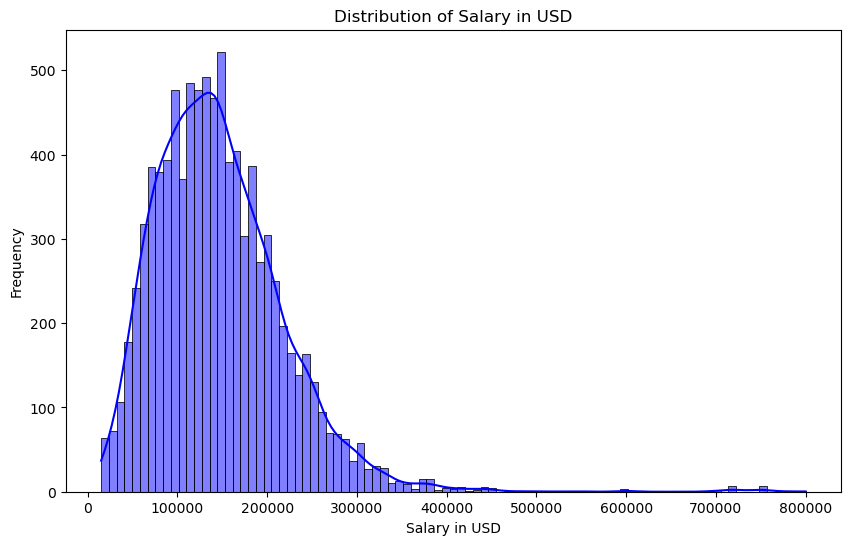

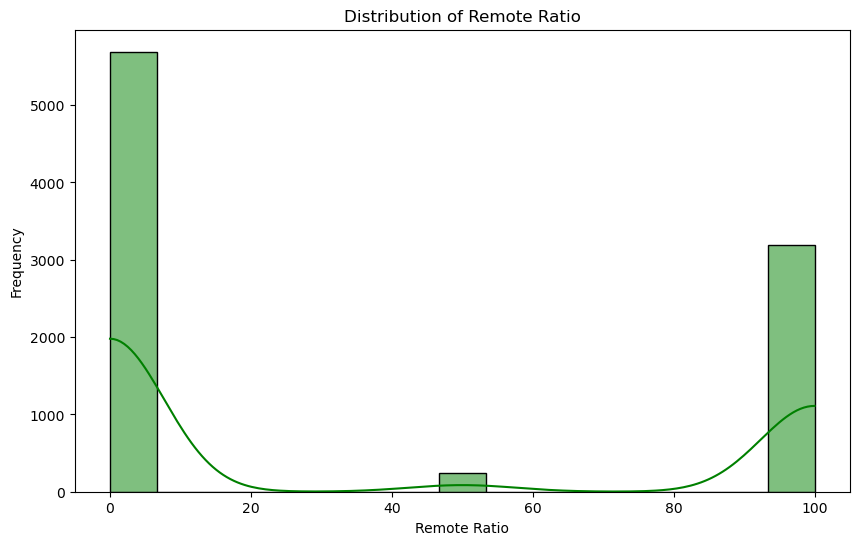

In [21]:
# Salary distribution
plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_usd'], kde=True, color='blue')
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

# Remote ratio distribution
plt.figure(figsize=(10,6))
sns.histplot(df['remote_ratio'], kde=True, color='green')
plt.title('Distribution of Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Frequency')
plt.show()

In [38]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Calculate correlation
correlation_matrix = numeric_data.corr()

# 4. Correlation Heatmap

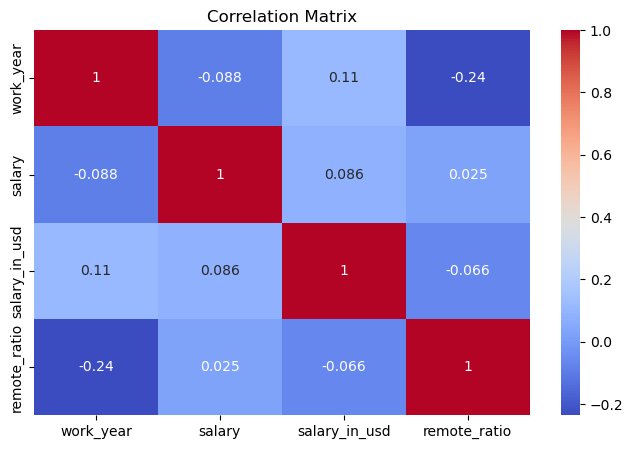

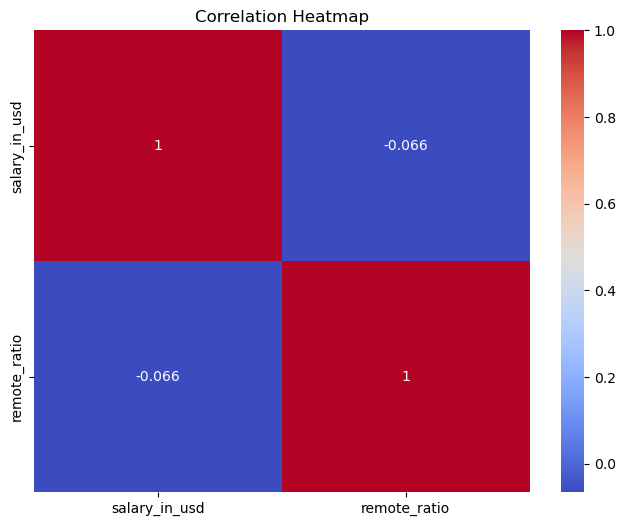

In [41]:
# Visualize correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

correlation_matrix = df[['salary_in_usd', 'remote_ratio']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

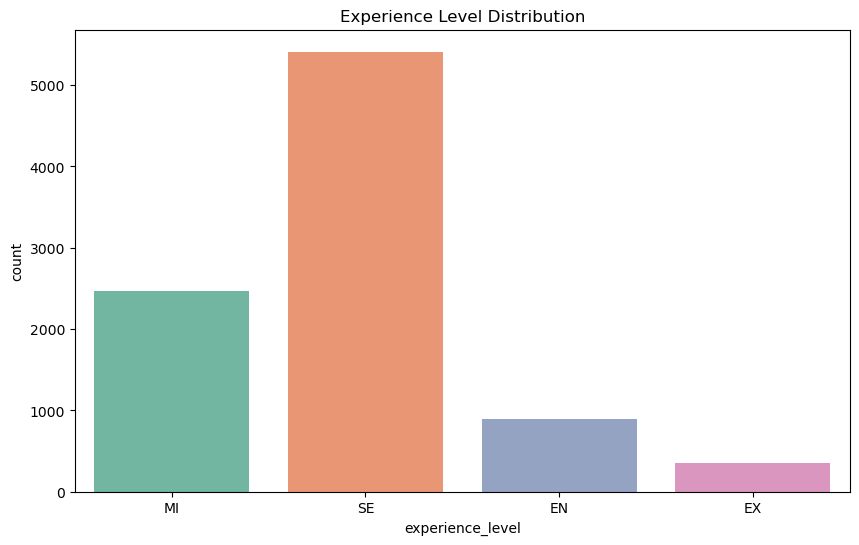

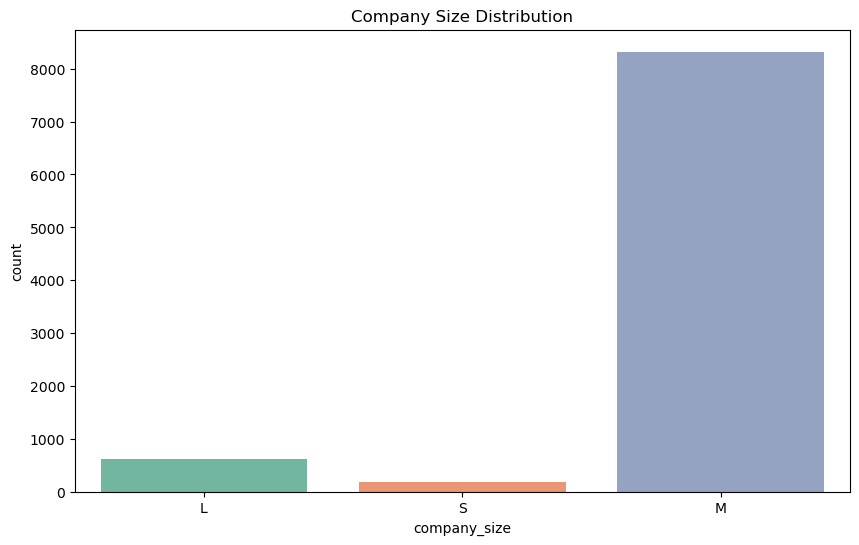

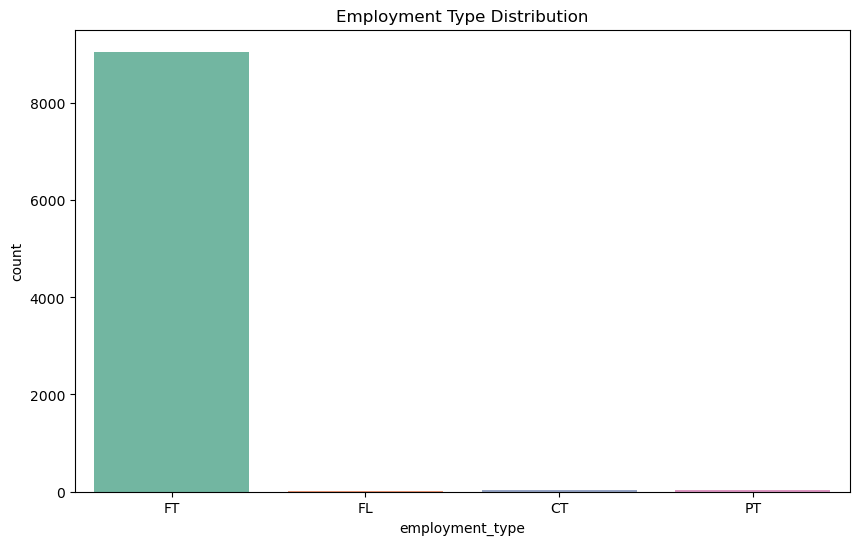

In [42]:
# 5. Countplot for Categorical Variables

# Experience Level Count
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='experience_level', hue='experience_level', palette='Set2', legend=False)
plt.title('Experience Level Distribution')
plt.show()

# Company Size Count
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='company_size', hue='company_size', palette='Set2', legend=False)
plt.title('Company Size Distribution')
plt.show()

# Job Title Count
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='employment_type', hue='employment_type', palette='Set2', legend=False)
plt.title('Employment Type Distribution')
plt.show()

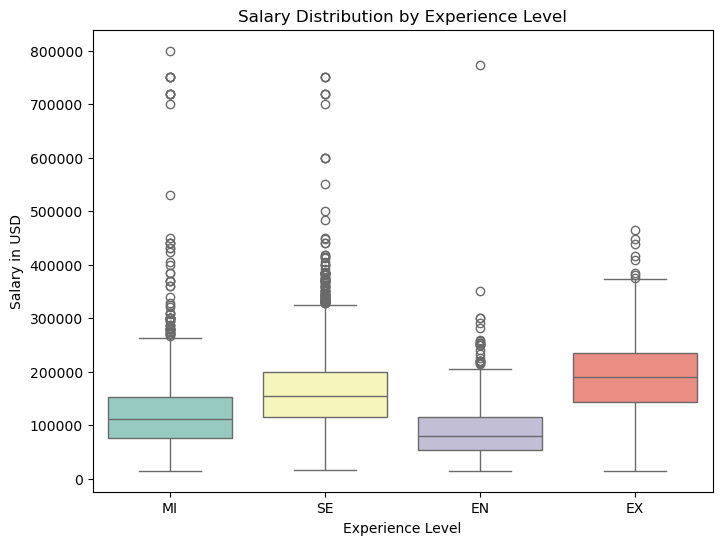

In [43]:
# 6. Boxplot: Salary vs Experience Level
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', hue='experience_level', palette="Set3", dodge=False)
plt.title('Salary Distribution by Experience Level')
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.show()

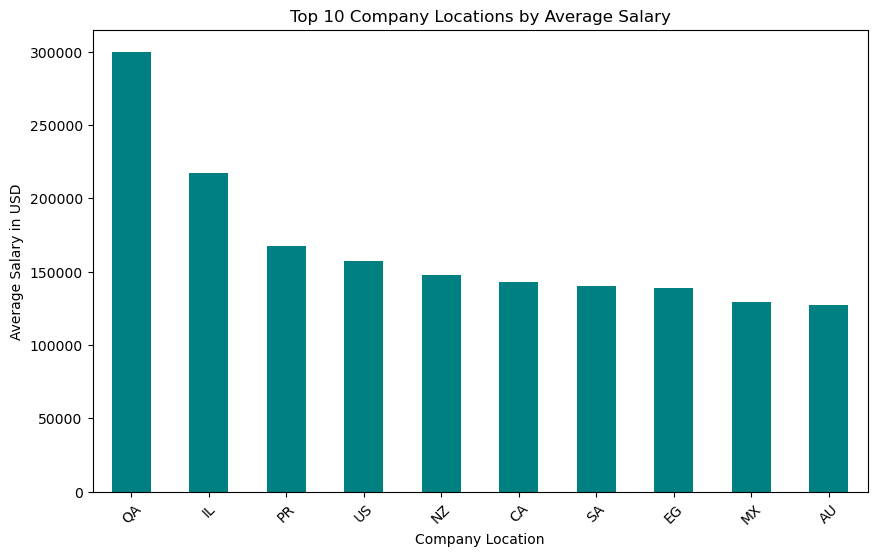

In [45]:
# Visualize the top locations with highest average salary
# Top 10 company locations by salary
top_locations = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Bar plot for top locations
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='teal')
plt.title("Top 10 Company Locations by Average Salary")
plt.xlabel("Company Location")
plt.ylabel("Average Salary in USD")
plt.xticks(rotation=45)
plt.show()